In [1]:
# Importing Pandas and other Libraries
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Loading Dataset
# Pandas read_csv() function imports a CSV file to DataFrame format.
df = pd.read_csv("AcademicPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,NaN
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [7]:
# Null count of each column - Used to find Null count of each column
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     6
reading score                  6
writing score                  3
dtype: int64

In [8]:
#The fillna() method replaces the NULL values with a specified value. 
#The fillna() method returns a new DataFrame object unless the inplace parameter is set to True
df['math score'].fillna(value=df['math score'].mean(),inplace=True)
df['writing score'].fillna(value=df['writing score'].mean(),inplace=True)
df['reading score'].fillna(value=df['reading score'].mean(),inplace=True)
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [37]:
# Scanning for Outliers
#The code defines a function named detect that takes a pandas DataFrame df as input.
#The function detects outliers in the data by calculating the z-score of each data point using
#the formula (data point - mean) / standard deviation. If the absolute value of the z-score is
#greater than a threshold value of 3, the data point is considered an outlier and is added to a
#list named outliers. The function returns the list of outliers found in the input data.
outliers = []
def detect(df):
    threshold = 3
    mean = np.mean(df)
    std = np.std(df)
    for d in df:
        z_score = (d-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(d)
    return outliers

In [38]:
# it calculates the z-scores of the 'math score' column in the DataFrame df using the detect function
var='math score'
z_scores=detect(df[var])
outliers=df[df[var].isin(z_scores)]

In [39]:
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
7,male,group B,some college,free/reduced,none,120.0,43.0,39.0
17,female,group B,some high school,free/reduced,none,18.0,32.0,28.0
39,male,group B,associate's degree,free/reduced,none,10.0,56.0,57.0
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0
113,female,group D,some college,standard,none,1.0,58.0,54.0
139,male,group D,some college,standard,completed,200.0,61.0,69.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0


In [41]:
dfs = df[~df.index.isin(outliers.index)]

In [11]:
z_scores=detect(df[var])

In [12]:
outliers=df[df[var].isin(z_scores)]

In [16]:
dfs

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.000000
1,female,group C,some college,standard,completed,69.0,90.0,88.000000
2,female,group B,master's degree,standard,none,90.0,95.0,93.000000
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,68.402207
4,male,group C,some college,standard,none,76.0,78.0,75.000000
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.000000
996,male,group C,high school,free/reduced,none,62.0,55.0,55.000000
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.000000
998,female,group D,some college,standard,completed,68.0,78.0,77.000000


In [42]:
dfs.skew(axis =0)

C:\Users\SKY_NET\AppData\Local\Temp\ipykernel_20368\4029879126.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfs.skew(axis =0)


math score      -0.156129
reading score    5.988083
writing score    3.993831
dtype: float64

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

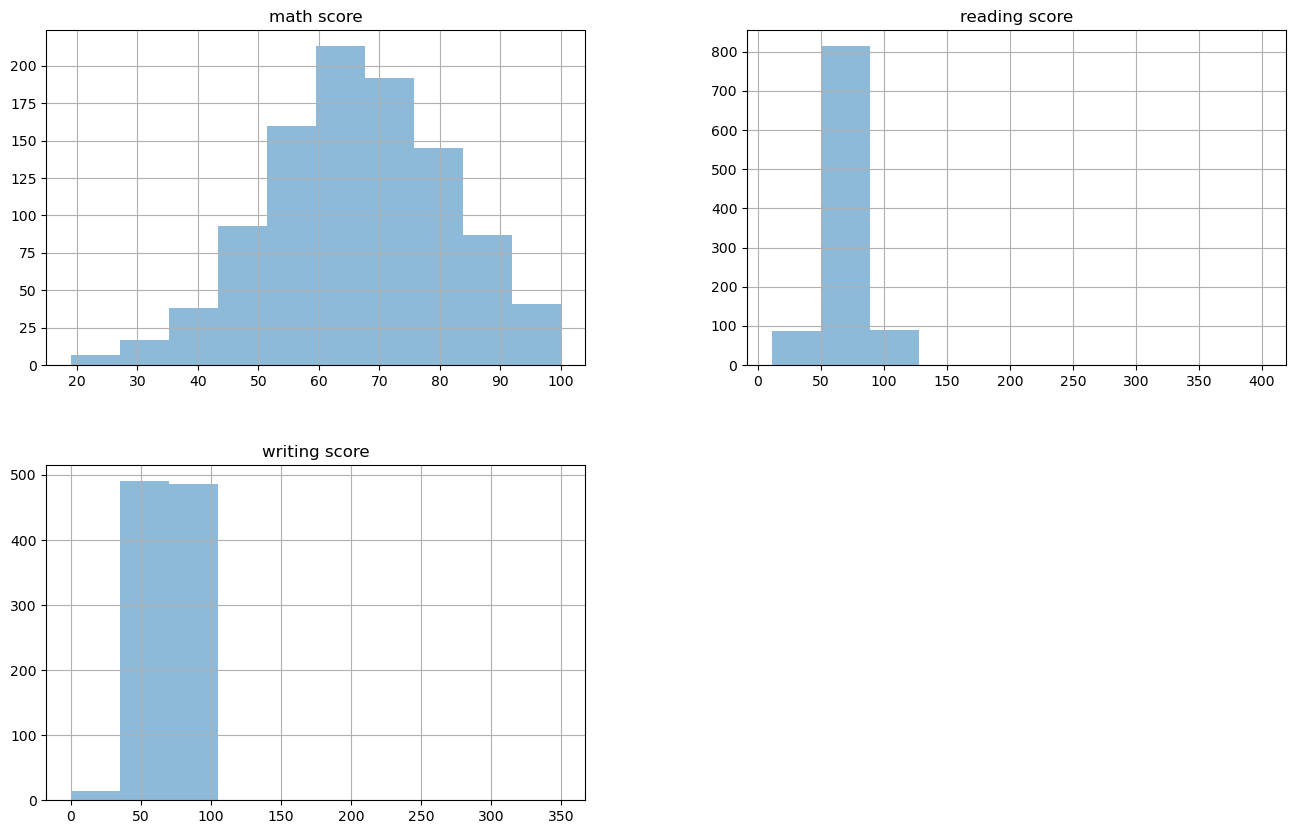

In [18]:
#This code creates a histogram for each column in the DataFrame dfs using the .hist() method.
dfs.hist(alpha=0.5, figsize=(16, 10))

<AxesSubplot:xlabel='writing score', ylabel='Density'>

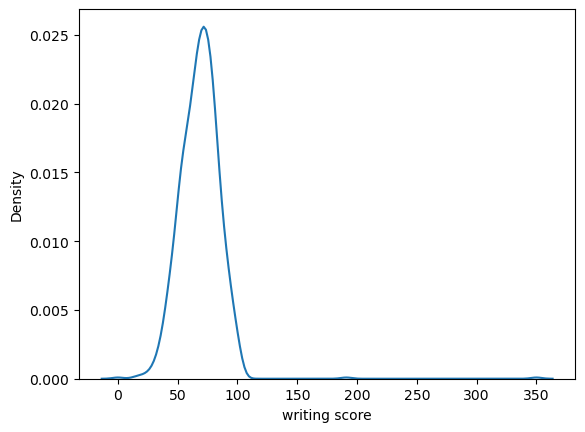

In [43]:
#A KDE plot is a non-parametric way to estimate the probability density function of a variable. 
#It shows a smooth curve that approximates the shape of the underlying distribution of the data.
sns.kdeplot(dfs['writing score'])

C:\Users\SKY_NET\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

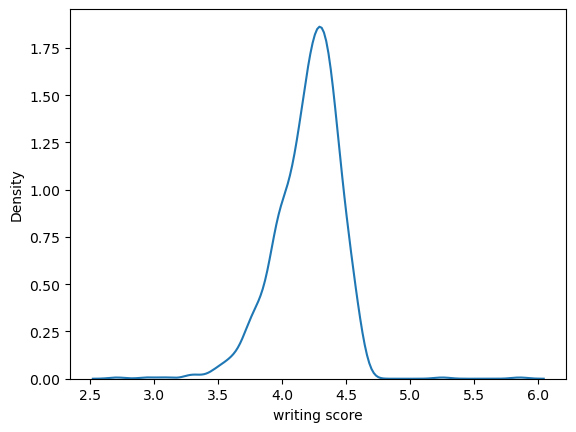

In [20]:
a = np.log(dfs['writing score'])
a.skew(axis=0)
sns.kdeplot(a)

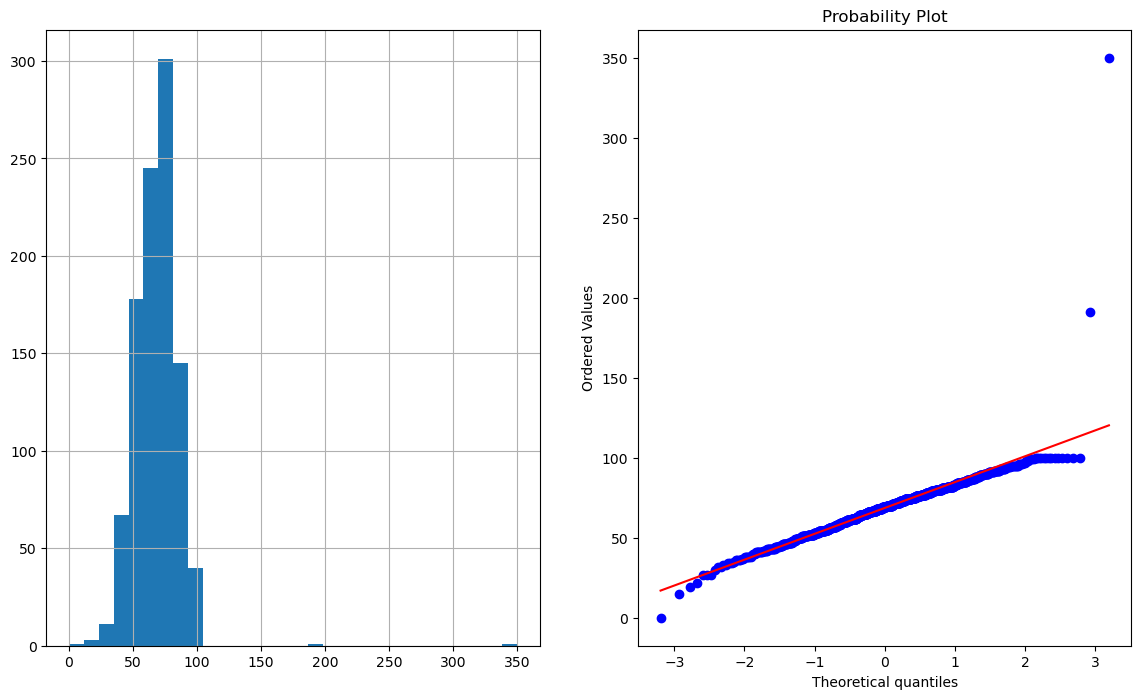

In [21]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
dfs['writing score'].hist(bins=30)
plt.subplot(1,2,2)
stats.probplot(dfs['writing score'], dist="norm", plot=plt)
plt.show()

C:\Users\SKY_NET\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


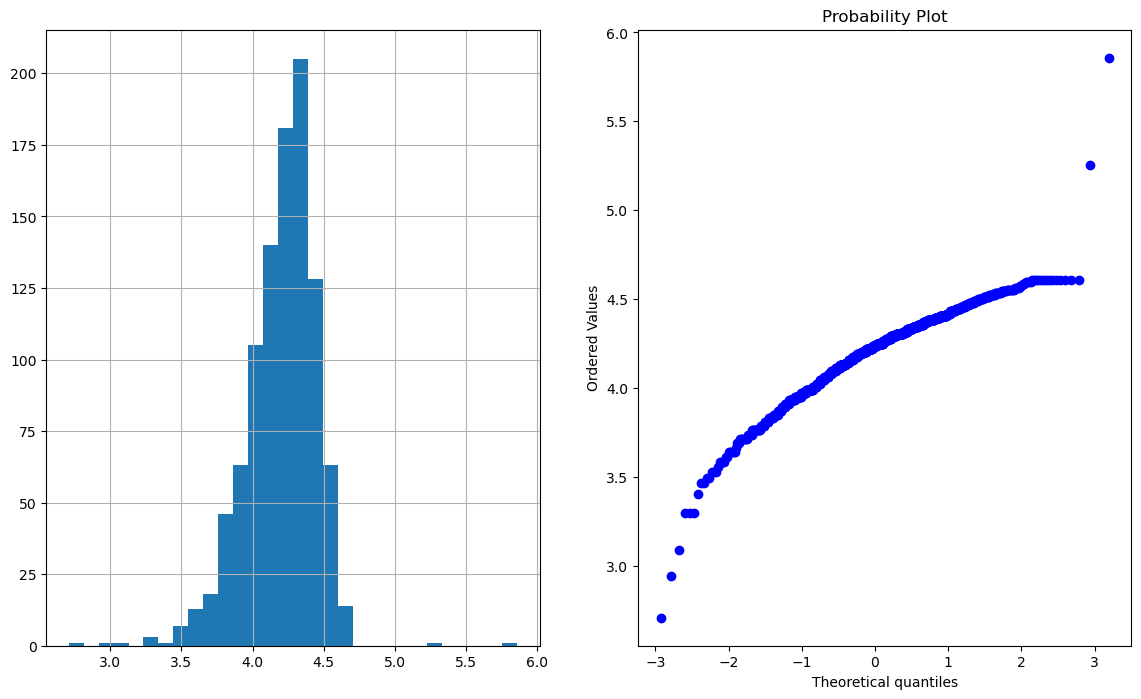

In [22]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) 
a[np.isfinite(a)].hist(bins=30)
plt.subplot(1,2,2)
stats.probplot(a, dist="norm", plot=plt)
plt.show()

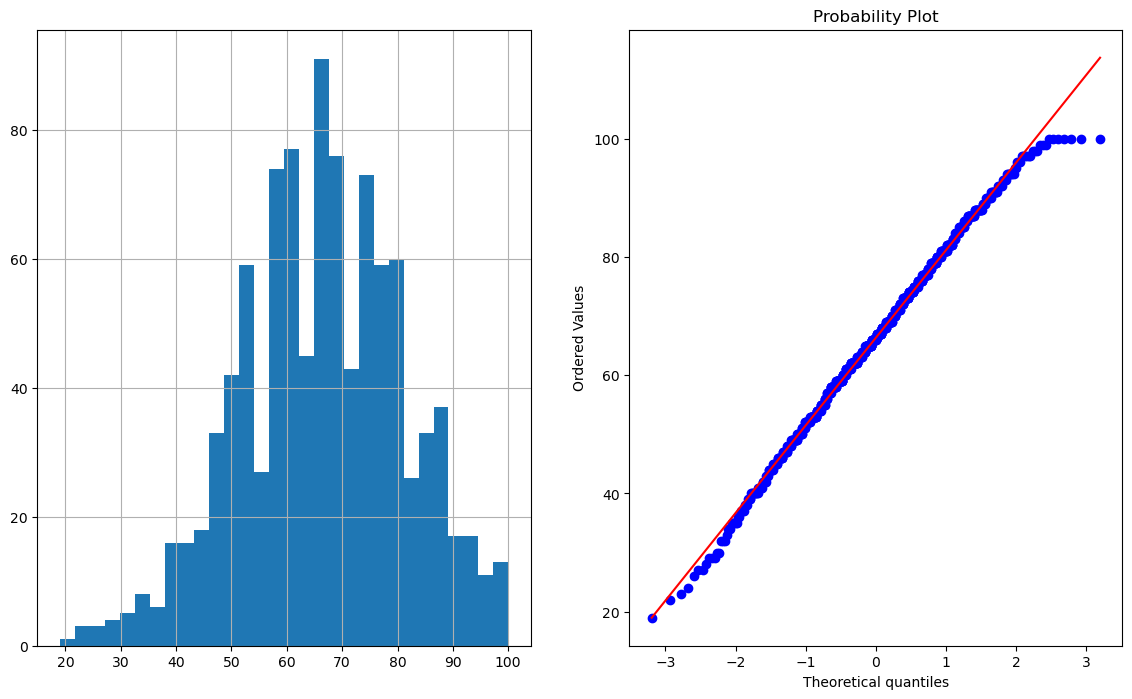

In [23]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
dfs['math score'].hist(bins=30)
plt.subplot(1,2,2)
stats.probplot(dfs['math score'], dist="norm", plot=plt)
plt.show()

<AxesSubplot:xlabel='math score', ylabel='Density'>

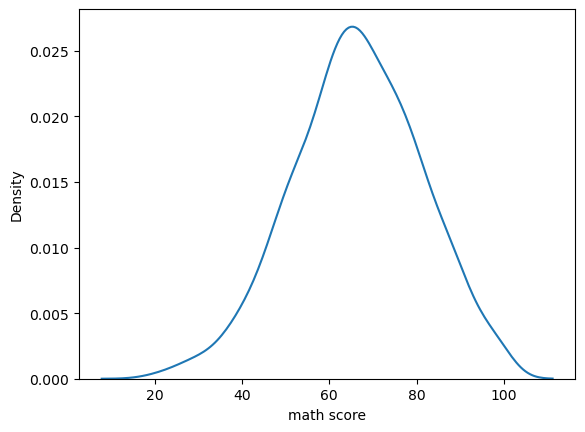

In [24]:
sns.kdeplot(dfs['math score'])

<AxesSubplot:xlabel='math score', ylabel='Density'>

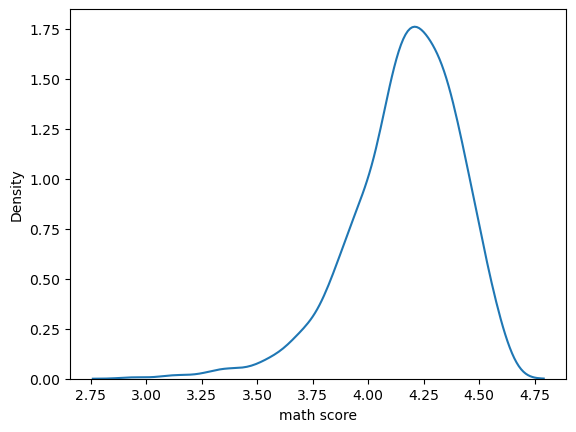

In [25]:
m = np.log(dfs['math score'])
m.skew(axis=0)
sns.kdeplot(m)

C:\Users\SKY_NET\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


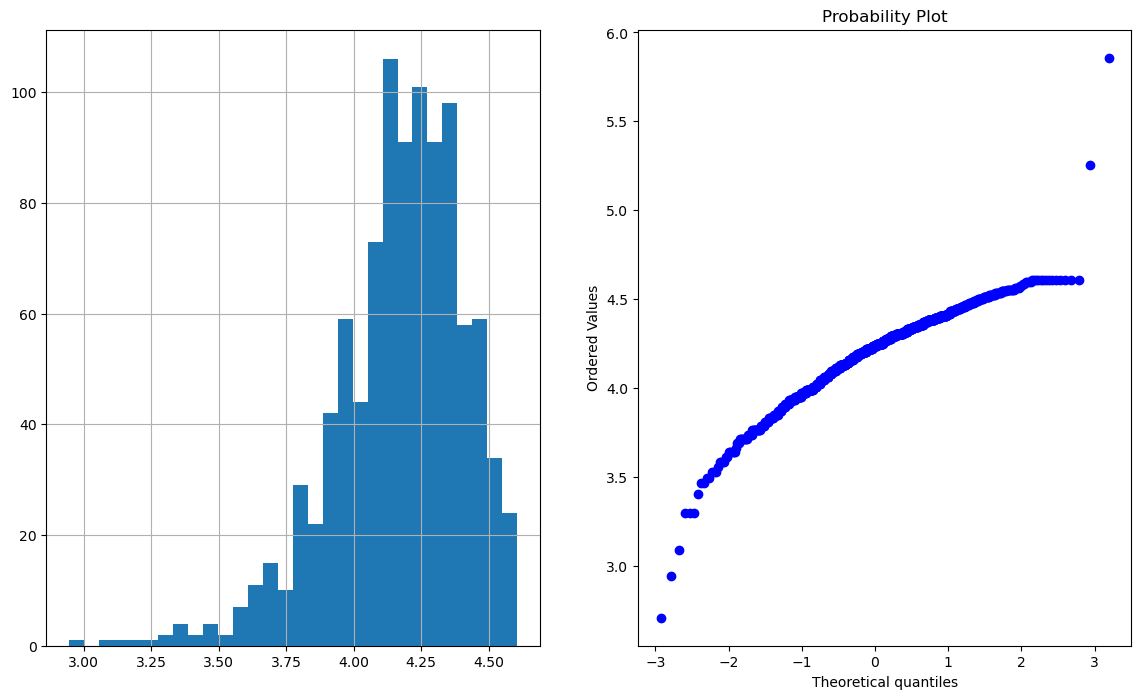

In [26]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) 
m[np.isfinite(m)].hist(bins=30)
plt.subplot(1,2,2)
stats.probplot(a, dist="norm", plot=plt)
plt.show()